In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from time import time
%matplotlib inline

In [106]:
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_csv('data/clean/train_clean_v2.csv')
df_targets = pd.read_csv('data/clean/train_labels.csv')
df.head()

,fecha_dato,fecha_dato_year,fecha_dato_month,fecha_dato_day,ncodpers,ind_empleado,pais_residencia,sexo,age,fecha_alta,...,indresi,indext,canal_entrada,indfall,tipodom,cod_prov,nomprov,ind_actividad_cliente,renta,segmento
0,2015-01-28,2015,1,28,1375586,1,1,1,35,2015-01-12,...,2,1,20,1,1.0,29.0,7,1.0,87218.10,1
1,2015-01-28,2015,1,28,1050611,1,1,1,23,2012-08-10,...,2,2,1,1,1.0,13.0,23,0.0,35548.74,2
2,2015-01-28,2015,1,28,1050612,1,1,1,23,2012-08-10,...,2,1,1,1,1.0,13.0,23,0.0,122179.11,2
3,2015-01-28,2015,1,28,1050613,1,1,1,22,2012-08-10,...,2,1,7,1,1.0,50.0,6,0.0,119775.54,2
4,2015-01-28,2015,1,28,1050615,1,1,1,23,2012-08-10,...,2,1,1,1,1.0,45.0,16,0.0,22220.04,2


In [6]:
df_copy = df.copy()

In [4]:
df.shape, df_targets.shape

((10795392, 27), (10795392, 24))

In [7]:
x = df_copy.drop(['fecha_dato', 'fecha_alta', 'ncodpers'], axis=1).as_matrix()
y = df_targets.as_matrix()
print('Tamaño de datasets', x.shape, y.shape)

Tamaño de datasets (10795392, 24) (10795392, 24)


In [113]:
def metrics(x_train, y_train, x_test, y_test, clf):
    
    #INPUTS
    #x_train: data to train
    #y_train: target, one column
    #x_test: data to test
    #y_test: target to test, one column
    #clf: classifier
    
    clf.fit(x_train, y_train)
    preds = [clf.predict(row.reshape(1, -1))[0] for row in x_test]
    
    tn, fp, fn, tp = confusion_matrix(y_test, preds).ravel()
    sensitivity = tp / (tp + fn)
    specifity = tn / (tn + fp)
    
    #OUTPUTS
    #preds (list): predictions for each row
    #tn: true negative
    #fp: false positive
    #fn: false negative
    #tp: true positive
    return tn, fp, fn, tp, sensitivity, specifity

### Cálculo de métricas tales como True Positive Rate, True Negative Rate, y otros.

In [16]:
x_train = x[:10094948]
x_test = x[10094948:]
y_train = y[:10094948]
y_test = y[10094948:]

In [119]:
%%time
rf = RandomForestClassifier()
tn, fp, fn, tp, sensitivity, specifity = metrics(x_train, y_train[:, 1], x_test, y_test[:, 1], rf)
print(df_targets.columns[1])
print('True positive:', tp)
print('False positive:', fp)
print('True positive rate or sensitivity:', sensitivity)
print('True negative:', tn)
print('False negative:', fn)
print('True negative rate or specifity:', specifity)
print()

ind_aval_fin_ult1
True positive: 6
False positive: 1
True positive rate or sensitivity: 0.428571428571
True negative: 700429
False negative: 8
True negative rate or specifity: 0.999998572306

CPU times: user 19min 46s, sys: 6.1 s, total: 19min 52s
Wall time: 19min 51s


### Matriz de correlación

In [167]:
corr = df_copy.drop(['fecha_dato', 'fecha_alta', 'ncodpers'], axis=1).corr()
corr.shape

(24, 24)

In [209]:
corr_mat = corr.dropna(how='all', axis=1).dropna(how='all', axis=0).as_matrix()

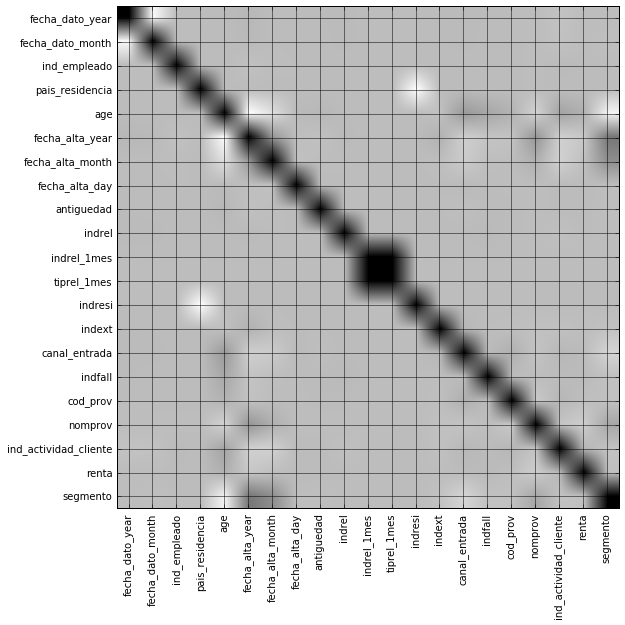

In [280]:
plt.figure(figsize=(9,9))
plt.imshow(corr_mat, cmap=plt.cm.Greys)
plt.yticks(range(len(corr_mat)), corr.columns)
plt.xticks(range(len(corr_mat)), corr.columns, rotation='vertical');
plt.grid(linestyle='-')